##Код


In [32]:
#Всякие загрузки
%pip install pymorphy2
import requests
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd
import nltk
import pymorphy2
nltk.download('stopwords')

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
#Добавим русские стоп слова
russian_stopwords = set(["и", "в", "во", "не", "что", "он", "на", "я", "с", "со", "как", "а", "то", "все", "она", "так", "его", "но", "да", "ты", "к", "у", "же", "вы", "за", "бы", "по", "только", "ее", "мне", "было", "вот", "от", "меня", "еще", "нет", "о", "из", "ему", "теперь", "когда", "даже", "ну", "вдруг", "ли", "если", "уже", "или", "ни", "быть", "был", "него", "до", "вас", "нибудь", "опять", "уж", "вам", "ведь", "там", "потом", "себя", "ничего", "ей", "может", "они", "тут", "где", "есть", "надо", "ней", "для", "мы", "тебя", "их", "чем", "была", "сам", "чтоб", "без", "будто", "чего", "раз", "тоже", "себе", "под", "будет", "ж", "тогда", "кто", "этот", "того", "потому", "этого", "какой", "совсем", "ним", "здесь", "этом", "один", "почти", "мой", "тем", "чтобы", "нее", "сейчас", "были", "куда", "зачем", "всех", "никогда", "можно", "при", "наконец", "два", "об", "другой", "хоть", "после", "над", "больше", "тот", "через", "эти", "нас", "про", "всего", "них", "какая", "много", "разве", "три", "эту", "моя", "впрочем", "хорошо", "свою", "этой", "перед", "иногда", "лучше", "чуть", "том", "нельзя", "такой", "им", "более", "всегда", "конечно", "всю", "между"])

In [18]:
#Извлекаем текст из ХТМЛ страницы
class WebScraper:
    def __init__(self, url):
        self.url = url

    def extract_article_text(self):
        response = requests.get(self.url)
        html_content = response.content
        soup = BeautifulSoup(html_content, "html.parser")
        article_text = soup.get_text()
        return article_text

In [19]:
#Токенизация, очистка и фильтрация текста
class TextProcessor:
    def __init__(self, nltk_stopwords, russian_stopwords):
        self.nltk_stopwords = nltk_stopwords
        self.russian_stopwords = russian_stopwords

    def tokenize_and_clean(self, text):
        words = text.split()
        filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in self.nltk_stopwords and word.lower() not in self.russian_stopwords]
        return filtered_words


In [20]:
#Наш пайплайн
class ETLPipeline:
    def __init__(self, url):
        self.url = url
        self.nltk_stopwords = set(stopwords.words("english"))
        self.russian_stopwords = russian_stopwords

    def run(self):
        scraper = WebScraper(self.url)
        article_text = scraper.extract_article_text()

        processor = TextProcessor(self.nltk_stopwords, self.russian_stopwords)
        filtered_words = processor.tokenize_and_clean(article_text)

        word_freq = Counter(filtered_words)
        df = pd.DataFrame(word_freq.items(), columns=["Words", "Frequencies"])
        df = df.sort_values(by="Frequencies", ascending=False)
        return df

In [41]:
#Для визуализации
def plot_heatmap(df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.set_index('Words'), annot=True, cmap='YlGnBu', cbar=False)
    plt.title('Word Frequency Heatmap')
    plt.show()

def plot_wordcloud(df):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(df.set_index('Words')['Frequencies'])
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud')
    plt.show()

## Получаем датафрейм из HTML страницы + визуализация


In [47]:
#точка входа и выхода
if __name__ == "__main__":
    article_url = "https://ru.wikipedia.org/wiki/HTML" #Сюда вставить свою ссылку
    pipeline = ETLPipeline(article_url)
    result_df = pipeline.run()
    print(result_df.head())

            Words  Frequencies
0            html           64
548          дата           17
549  архивировано           17
118       править           13
285        января           13


In [ ]:
#result_df.Words.tolist()

In [ ]:
result_df

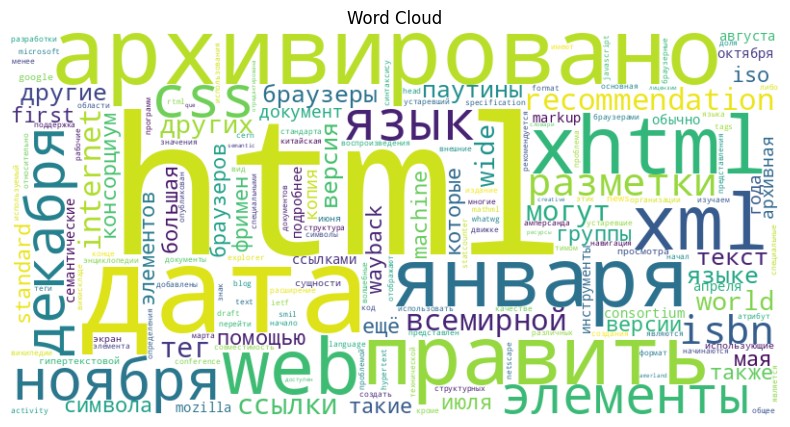

In [49]:
# Карта слов
plot_wordcloud(result_df)

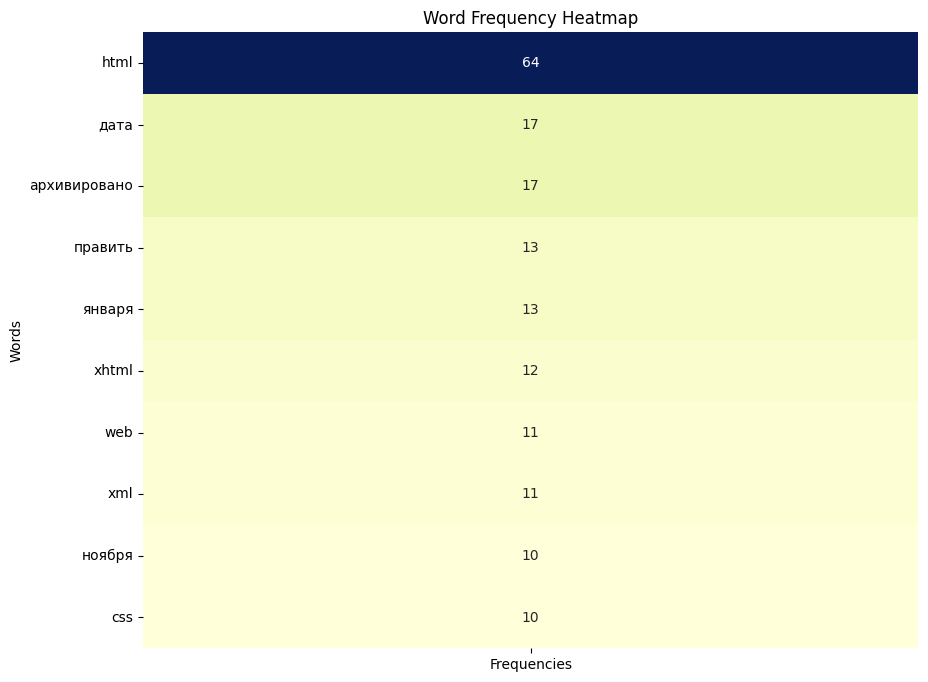

In [50]:
#heatmap
plot_heatmap(result_df.head(10))
